# 2024-1 Artificial Intelligence (01)
## Homework #2: Implementation of a CNN with TensforFlow Keras
---
Copyright (c) Prof. Jaehyeong Sim

Department of Computer Science and Engineering

ELTEC College of Engineering

Ewha Womans University

## Guideline
### Introduction
> Here in this homework assignment 2, we will implement a CNN using TensorFlow Keras library.

### Your job
1. Please complete the code. You only have to write the parts marked as **### Please fill here**.
2. Please run your code with GPU session
3. Please answer the questions at the bottom of this notebook.

### Submission guide
1. Please rename the completed skeleton file to ***STUDENT_ID*.ipynb**. Your own student ID goes to *STUDENT_ID*. For example, if your student ID is 2412345, the file name should be **2412345.ipynb**
2. Turn in it into the Ewha CyberCampus

⚠ If you doesn't follow the submission guide above, you will get **5 point deduction** from this homework score.

### Importing necessary libraries

In [ ]:
import tensorflow.keras as keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

### Loading and preprocessing MNIST dataset

In [ ]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_valid = X_valid.reshape(10000, 28, 28, 1).astype('float32')
X_train /= 255
X_valid /= 255
n_classes = 10
y_train = keras.utils.to_categorical(y_train, n_classes)
y_valid = keras.utils.to_categorical(y_valid, n_classes)

### Define residual block
**Parameters:**
*   x: input
*   ch: output channel size
*   k: kernel size

**Return:**
*   final output

**The diagram of residual block:**

![[2023-1 AI] HW2.png](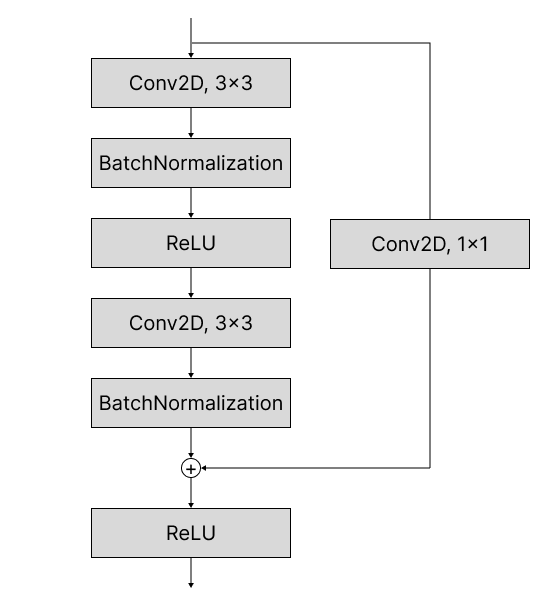)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, Input
from tensorflow.keras.regularizers import l2

def ResidualBlock(x, ch, k):
    ### Please fill here
    # Hint: use layers.Add() to merge skip connection

    # 첫 번째 컨볼루션 레이어
    x_shortcut = Conv2D(ch, kernel_size=(k, k), padding='same')(x)
    x_shortcut = tf.keras.layers.BatchNormalization()(x_shortcut)

    # 두 번째 컨볼루션 레이어
    x = Conv2D(ch, kernel_size=(k, k), padding='same', activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)

    # Shortcut connection 추가
    x = tf.keras.layers.Add()([x, x_shortcut])
    x = tf.keras.layers.Activation('relu')(x)

    return x

### Define the whole network
**The diagram of ResNet7:**

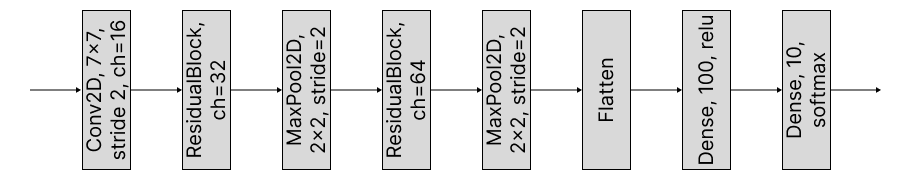

In [ ]:
def ResNet7():
  ### Please fill here

  # 입력 레이어 생성
  input_layer = Input(shape=(28, 28, 1))

  x = Conv2D(filters=16, kernel_size=5, strides=2, activation='tanh', kernel_regularizer=l2(0.001))(input_layer)
  x = ResidualBlock(x, ch=32, k=3)
  x = MaxPooling2D(pool_size=(2, 2), strides=2)(x)
  x = ResidualBlock(x, ch=64, k=3)
  x = MaxPooling2D(pool_size=(2, 2), strides=2)(x)
  x = Flatten()(x)
  x = Dense(100, activation='relu')(x)
  x = Dropout(0.3)(x)  # 드롭아웃 추가
  output_layer = Dense(10, activation='softmax')(x)

  model = models.Model(inputs=input_layer, outputs=output_layer)
  model.compile(loss='categorical_crossentropy',
                optimizer=keras.optimizers.Adam(),
                metrics=['accuracy'])

  return model

### Model instantiation

In [ ]:
model = ResNet7()

### Training loop

In [ ]:
history = model.fit(
    X_train,
    y_train,
    batch_size = 256,
    epochs = 20,
	  verbose = 1,
    validation_data=(X_valid, y_valid))

Epoch 1/20
235/235 [==============================] - 6s 9ms/step - loss: 0.3370 - accuracy: 0.9019 - val_loss: 0.8434 - val_accuracy: 0.8365
Epoch 2/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0827 - accuracy: 0.9754 - val_loss: 0.0811 - val_accuracy: 0.9773
Epoch 3/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0601 - accuracy: 0.9824 - val_loss: 0.0463 - val_accuracy: 0.9846
Epoch 4/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0491 - accuracy: 0.9854 - val_loss: 0.0423 - val_accuracy: 0.9871
Epoch 5/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0381 - accuracy: 0.9883 - val_loss: 0.0316 - val_accuracy: 0.9897
Epoch 6/20
235/235 [==============================] - 2s 8ms/step - loss: 0.0342 - accuracy: 0.9899 - val_loss: 0.0294 - val_accuracy: 0.9909
Epoch 7/20
235/235 [==============================] - 2s 8ms/step - loss: 0.0296 - accuracy: 0.9915 - val_loss: 0.0330 - val_accuracy: 0.9895
Epoch 

### Plot training curve

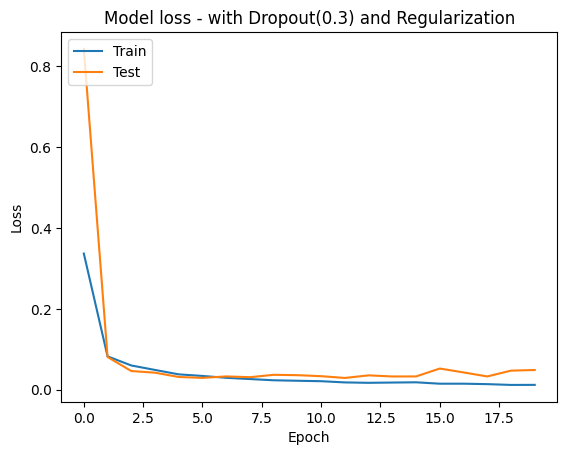

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss - with Dropout(0.3) and Regularization')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

---

### Question 1. Report training curve (Epoch vs. Loss) and final validation accuracy without any regularization method.

#### Answer:
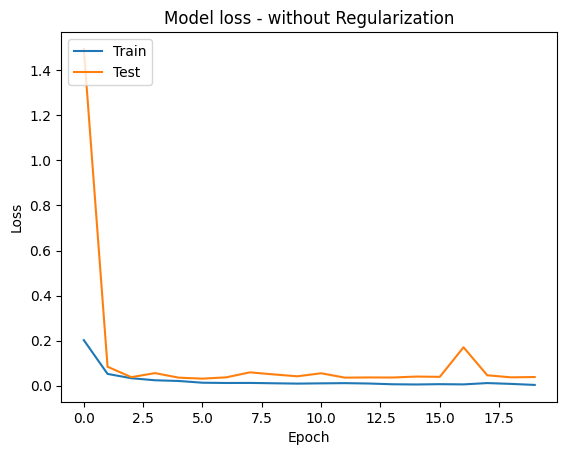
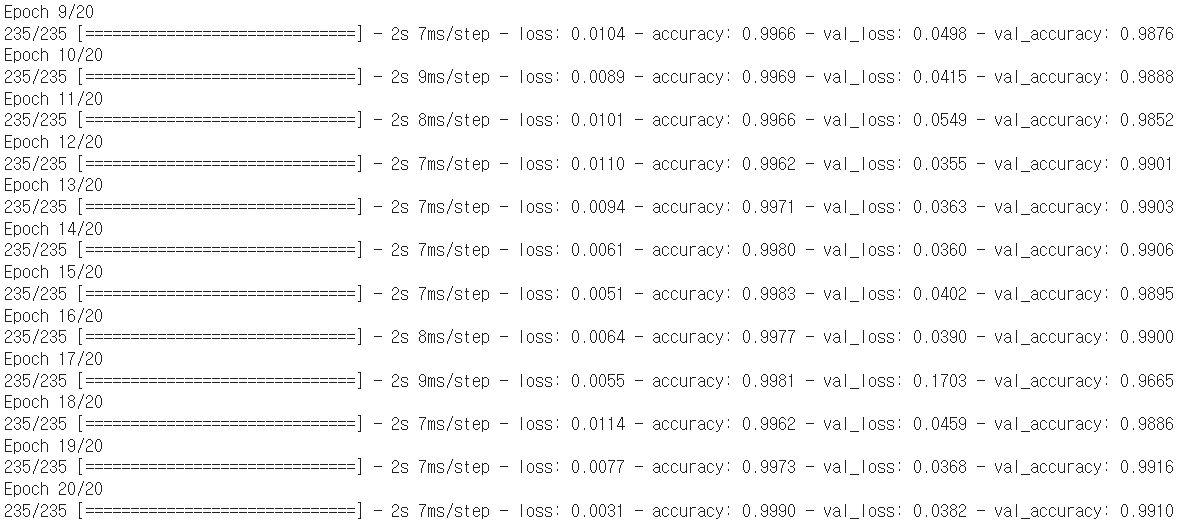

-----

### Question 2. Report training curve (Epoch vs. Loss) and final validation accuracy with dropout applied (dropout rate: 0.3). Explain how you applied dropout on your code.

#### Answer: I applied dropout (rate 0.3) by adding a Dropout layer after Fully Connected layer, especially after Dense layer with ReLU.

```
x = Dropout(0.3)(x)  # 드롭아웃 추가
```
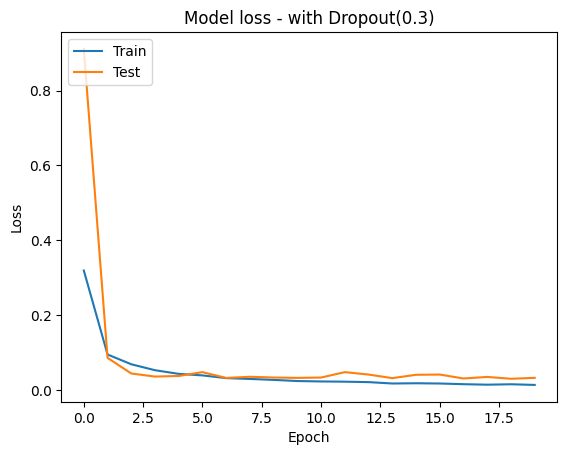

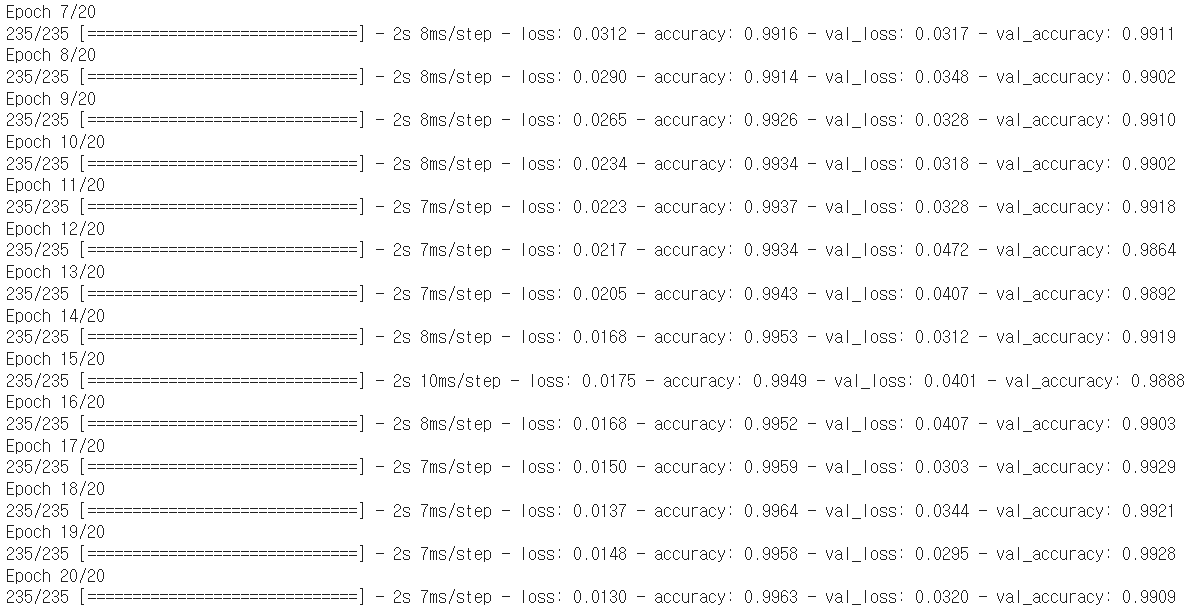

---

### Question 3. Report training curve (Epoch vs. Loss) and final validation accuracy with dropout and weight decay applied (L2 regularization with 0.001). Explain how you applied weight decay on your code.

#### Answer: I applied weight decay (L2 regularization with 0.001) by using the l2 function, which is passed as an argument to the kernel_regularizer parameter of the Conv2D layer.


```
x = Conv2D(filters=16, kernel_size=5, strides=2, activation='tanh', kernel_regularizer=l2(0.001))(input_layer)
```
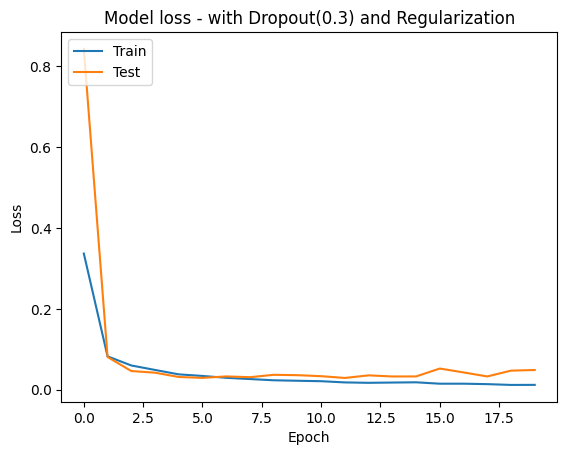

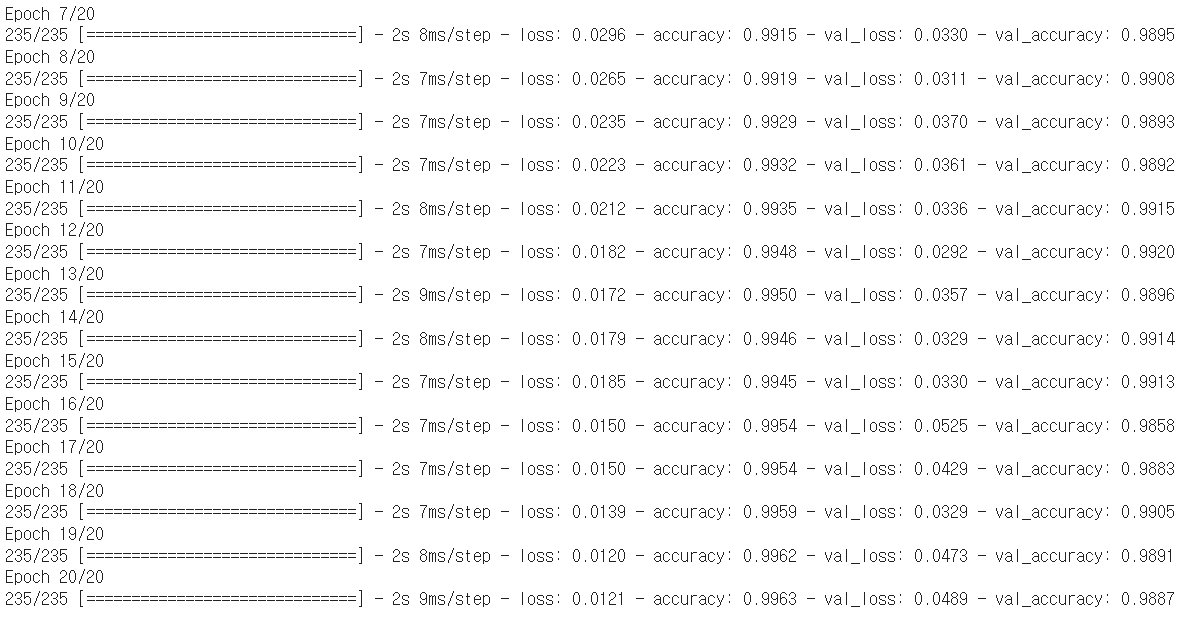
